In [78]:
%matplotlib inline
import joblib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
all_data0 = joblib.load("../all_data0")

In [4]:
train_data = all_data0[all_data0.outcome != -1]

In [5]:
train_data.columns

Index(['people_id', 'activity_id', 'act_date', 'activity_category',
       'act_char_1', 'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5',
       'act_char_6', 'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10',
       'outcome', 'ppl_char_1', 'group_1', 'ppl_char_2', 'reg_date',
       'ppl_char_3', 'ppl_char_4', 'ppl_char_5', 'ppl_char_6', 'ppl_char_7',
       'ppl_char_8', 'ppl_char_9', 'ppl_char_10', 'ppl_char_11', 'ppl_char_12',
       'ppl_char_13', 'ppl_char_14', 'ppl_char_15', 'ppl_char_16',
       'ppl_char_17', 'ppl_char_18', 'ppl_char_19', 'ppl_char_20',
       'ppl_char_21', 'ppl_char_22', 'ppl_char_23', 'ppl_char_24',
       'ppl_char_25', 'ppl_char_26', 'ppl_char_27', 'ppl_char_28',
       'ppl_char_29', 'ppl_char_30', 'ppl_char_31', 'ppl_char_32',
       'ppl_char_33', 'ppl_char_34', 'ppl_char_35', 'ppl_char_36',
       'ppl_char_37', 'ppl_char_38'],
      dtype='object')

In [73]:
train_data.dtypes

people_id                    object
activity_id                  object
act_date             datetime64[ns]
activity_category            object
act_char_1                   object
act_char_2                   object
act_char_3                   object
act_char_4                   object
act_char_5                   object
act_char_6                   object
act_char_7                   object
act_char_8                   object
act_char_9                   object
act_char_10                  object
outcome                       int64
ppl_char_1                   object
group_1                      object
ppl_char_2                   object
reg_date             datetime64[ns]
ppl_char_3                   object
ppl_char_4                   object
ppl_char_5                   object
ppl_char_6                   object
ppl_char_7                   object
ppl_char_8                   object
ppl_char_9                   object
ppl_char_10                    bool
ppl_char_11                 

In [159]:
def mean_response(factor):
    missing_pc = train_data[factor].isnull().values.ravel().sum() / len(train_data[factor])
    card = len(train_data[factor].unique())
    text = "missing value: %.2f\ncardinality: %d" % (missing_pc, card)
    mean_max = train_data.groupby([factor])['outcome'].apply(np.mean).max()

    
    fig, ax1 = plt.subplots()
    ax1 = train_data[factor].value_counts().plot(kind='bar', color='dodgerblue', alpha = 0.8, width=0.6, title = factor)
    ax2 = ax1.twinx()
    ax2 = train_data.groupby([factor])['outcome'].apply(np.mean).plot(ax = ax2, color='r', style = "--",linewidth = 1,grid = False)
    ax2.set_xlim((-0.5,card -0.5))
    
    
    ax2.text(1.5, mean_max-0.02, text, horizontalalignment='left',verticalalignment='top', color='black', fontsize=11,
         bbox={'facecolor':'white', 'alpha':0.3, 'pad':2})


In [ ]:
def main():
    
    factors = ['act_char_'+str(i) for i in range(1,2)]
    
    fig = plt.figure()
    
    for ind, factor in enumerate(factors):
        missing_pc = train_data[factor].isnull().values.ravel().sum() / len(train_data[factor])
        card = len(train_data[factor].unique())
        text = "missing value: %.2f\ncardinality: %d" % (missing_pc, card)
        mean_max = train_data.groupby([factor])['outcome'].apply(np.mean).max()


        ax1 = fig.add_subplot(5,2,ind+1)
        ax1 = train_data[factor].value_counts().plot(kind='bar', color='dodgerblue', alpha = 0.8, width=0.6, title = factor)
        ax2 = ax1.twinx()
        ax2 = train_data.groupby([factor])['outcome'].apply(np.mean).plot(ax = ax2, color='r', style = "--",linewidth = 1,grid = False)
        ax2.set_xlim((-0.5,card -0.5))


        ax2.text(1.5, mean_max-0.02, text, horizontalalignment='left',verticalalignment='top', color='black', fontsize=11,
             bbox={'facecolor':'white', 'alpha':0.3, 'pad':2})
        
    
main()
    

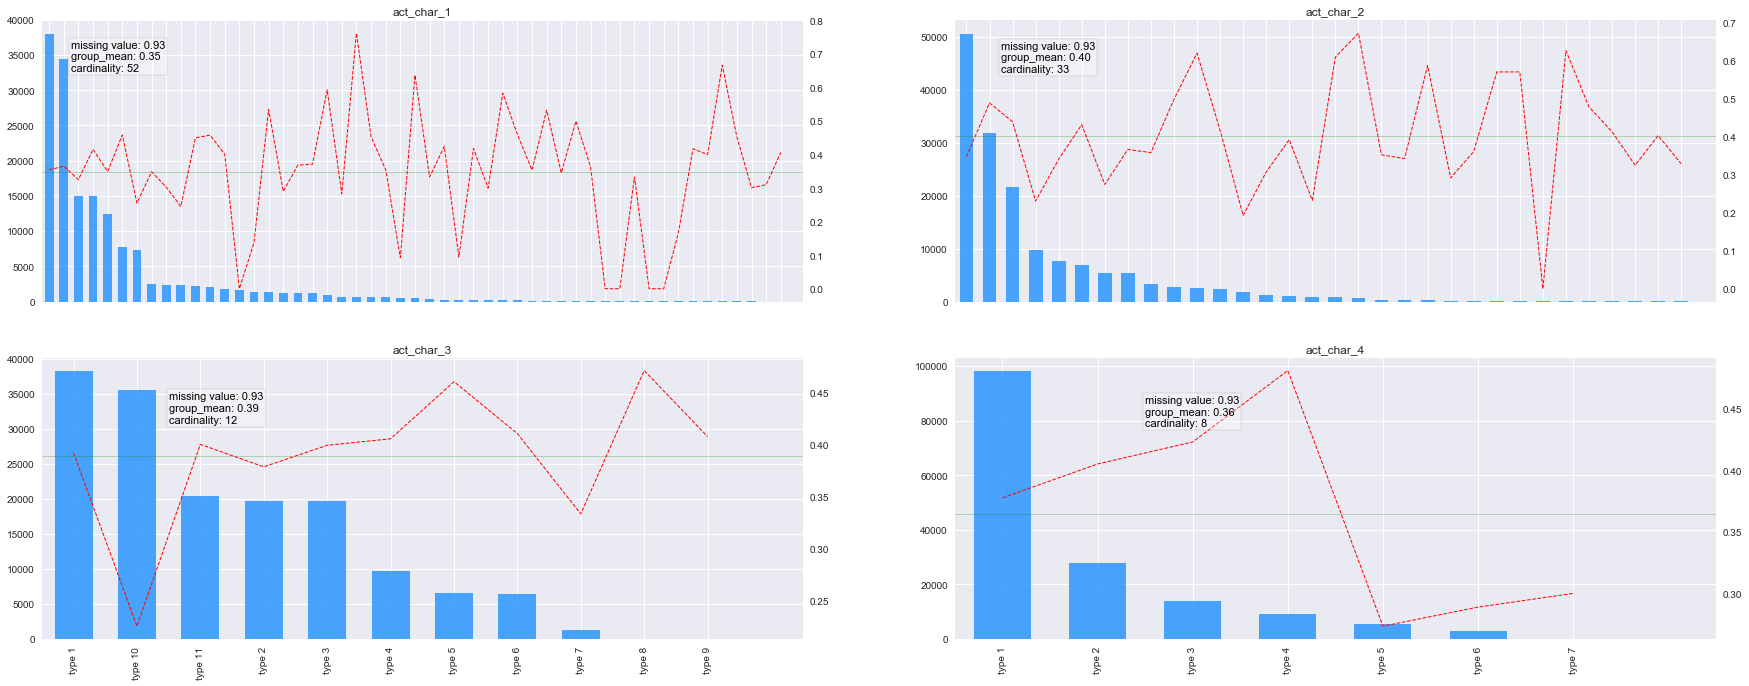

In [65]:
factors = ['act_char_'+str(i) for i in range(1,5)]
    
fig = plt.figure(figsize=(30,30))

for ind, factor in enumerate(factors):
    missing_pc = train_data[factor].isnull().values.ravel().sum() / len(train_data[factor])
    card = len(train_data[factor].unique())
    
    mean_max = train_data.groupby([factor])['outcome'].apply(np.mean).max()
    group_mean = train_data.groupby([factor])['outcome'].mean().mean()
    text = "missing value: %.2f\ngroup_mean: %.2f\ncardinality: %d" % (missing_pc,group_mean,card)

    ax1 = fig.add_subplot(5,2,ind+1)
    ax1 = train_data[factor].value_counts().plot(kind='bar', color='dodgerblue', alpha = 0.8, width=0.6, title = factor)
    
    ax2 = ax1.twinx()
    ax2 = train_data.groupby([factor])['outcome'].apply(np.mean).plot(ax = ax2, color='r', style = "--",linewidth = 1,grid = False)
    ax2.set_xlim((-0.5,card -0.5))
    ax2.axhline(y=group_mean,xmin=0,xmax=3,c="g",linewidth=0.5,zorder=0, alpha=0.5)
    ax2.text(1.5, mean_max-0.02, text, horizontalalignment='left',verticalalignment='top', color='black', fontsize=11,
         bbox={'facecolor':'white', 'alpha':0.3, 'pad':2})
    


In [17]:
train_data.groupby('act_char_7')['outcome'].mean()

act_char_7
type 1    0.427133
type 2    0.417684
type 3    0.376536
type 4    0.437093
type 5    0.405972
type 6    0.426914
type 7    0.427094
type 8    0.571992
Name: outcome, dtype: float64

In [71]:
train_data.outcome[train_data['act_char_7'].isnull().values.ravel()].mean()

0.44647581282517418

In [ ]:
df = pd.DataFrame(train_data['outcome'],train_data['outcome'], train_data['outcome'], train_data['outcome'])
df.columns = train_data[factors].apply(lambda x: x.isnull().values.ravel()).columns

In [81]:
train_data[factors].apply(lambda x: x.isnull().values.ravel()).columns

Index(['act_char_1', 'act_char_2', 'act_char_3', 'act_char_4'], dtype='object')

In [79]:
pd.crosstab(train_data['act_char_7','outcome'])

KeyError: ('act_char_7', 'outcome')